In [2]:
# 股票走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [6]:
# 数据加载
df = pd.read_csv('./shanghai_1990-12-19_to_2019-2-28.csv')


In [10]:
df.head(2)
df.tail(2)

,Timestamp,Price
Timestamp,,
2019-02-27,2019-02-27,2939.9287
2019-02-28,2019-02-28,2950.0548


In [9]:
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

In [14]:
df_month = df.resample('M').mean()
df_month.head(2)
df_Q = df.resample('Q-DEC').mean()
df_Q.head(2)
df_year = df.resample('A-DEC').mean()


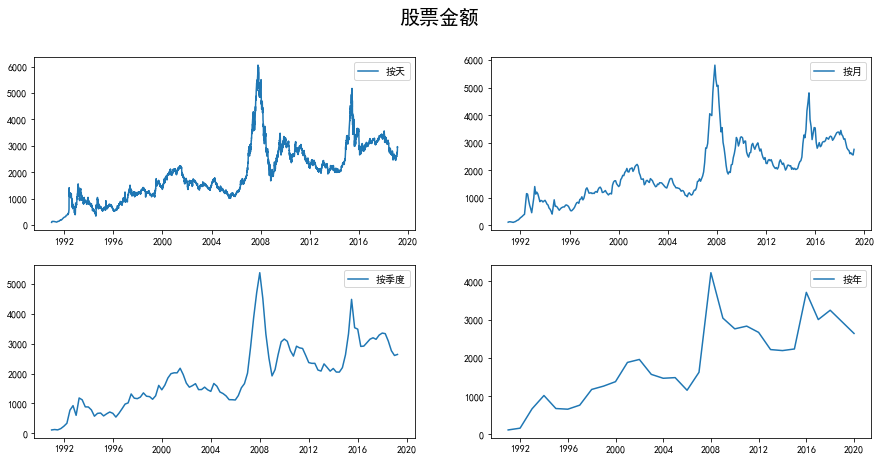

In [15]:
 
# 按照天，月，季度，年来显示股票的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('股票金额', fontsize=20)
plt.subplot(221)
plt.plot(df.Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Price, '-', label='按年')
plt.legend()
plt.show()

In [45]:

# 设置参数范围
ps = range(0, 3)
qs = [0,1]
parameters = product(ps, qs)
parameters_list = list(parameters)
parameters_list

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

In [46]:
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [47]:

# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())

最优模型:                                ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 0)   Log Likelihood               -2213.443
Method:                       css-mle   S.D. of innovations            164.776
Date:                Sun, 05 Apr 2020   AIC                           4434.886
Time:                        15:44:25   BIC                           4450.190
Sample:                    12-31-1990   HQIC                          4440.985
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1839.7872    479.424      3.837      0.000     900.134    2779.441
ar.L1.Price     1.3251      0.051     25.985      0.000       1.225       1.425
ar.L2.Price    -0.3420      0.051     -6.

In [48]:
df_month.tail(1)

,Price
Timestamp,
2019-02-28,2759.6714


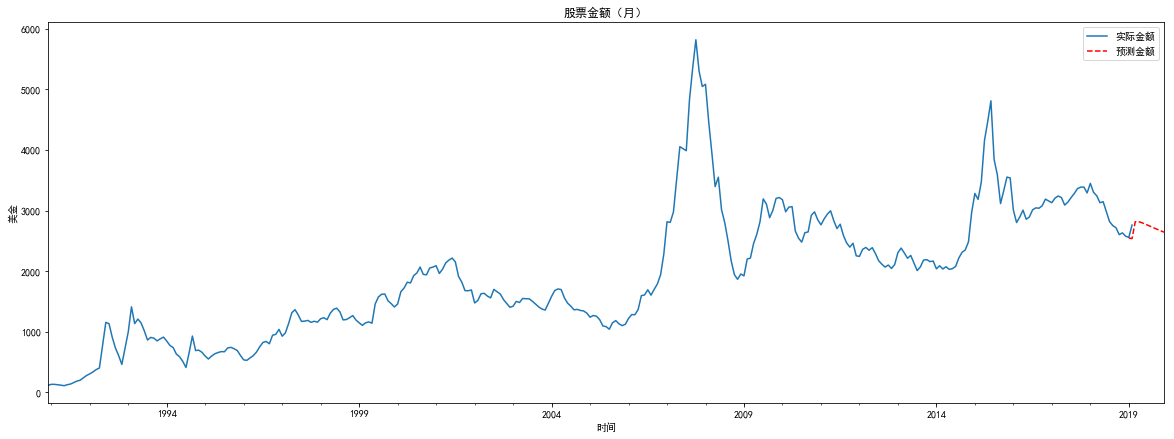

In [54]:

# 股票预测
df_month2 = df_month[['Price']]
date_list = [datetime(2019, 3, 31),datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30),datetime(2019, 7, 31),datetime(2019, 8, 31), datetime(2019, 9, 30), datetime(2019, 10, 31), datetime(2019, 11, 30), datetime(2019, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future]) 
df_month2['forecast'] = best_model.predict(start='2019', end='2020')
# 股票预测结果显示
plt.figure(figsize=(20,7))
df_month2.Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额') 
plt.legend()
plt.title('股票金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()